<a href="https://colab.research.google.com/github/milosixsix/IntroductionModelsML/blob/main/Ejercicio_de_Regresi%C3%B3n_Lineal_Actualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pand

datos = pand.read_csv("housing.csv")


In [64]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
#La primera parte en datos, solo nos dice los datos especificos en una columna

#value_counts() nos dice todos los distintos tipos de datos que hay y cuantos hay
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [66]:
#.info() nos da los metadatos, numero de datos, nombre de columnas, cuantos datos no ihay vacíos
# y el tipo de dato que es.
datos.info()
# hay que observar que en esta parte hay una columna que no tiene todos los datos completos, por lo que se debe solucionar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
#Esta funcion nos ayuda a encontrar tipos de datos estadisticos
# promedios, minimos, maximos, percentiles (25%, 50% Y 75%)
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

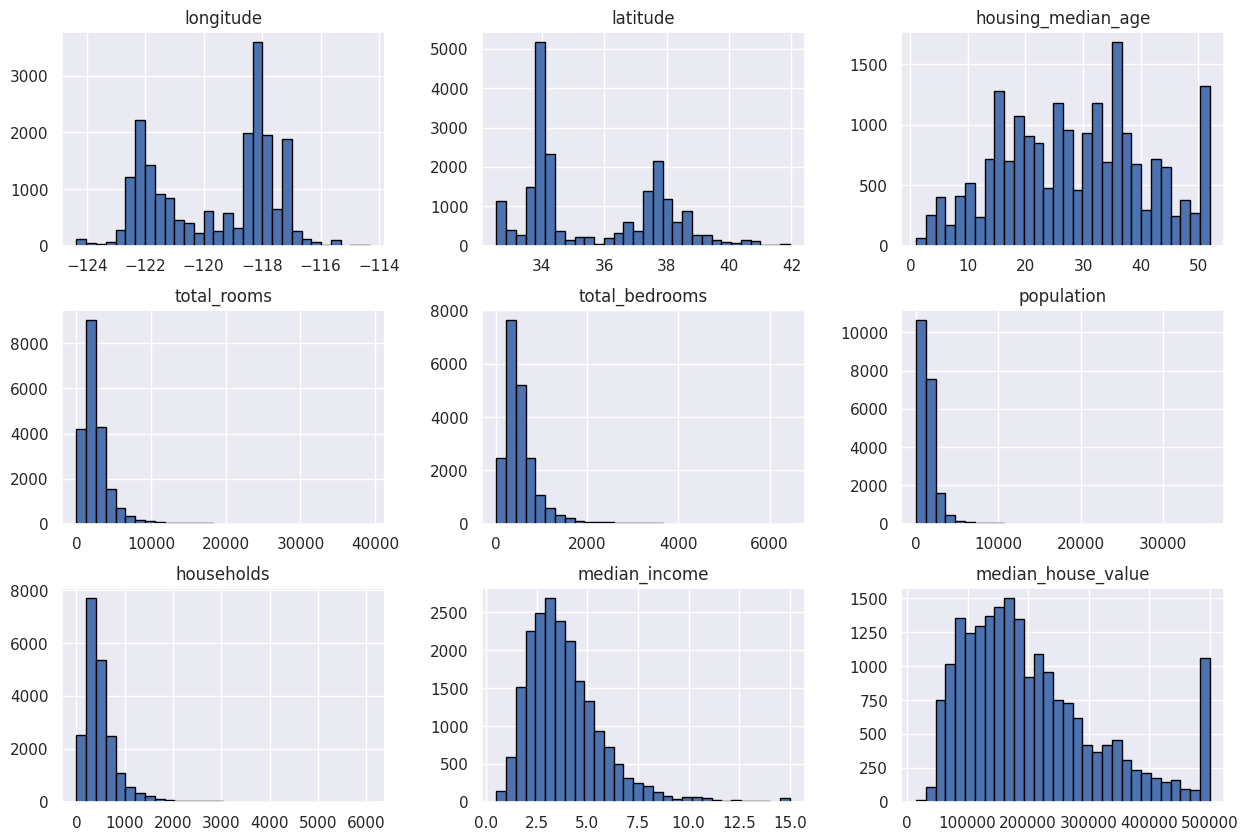

In [68]:
# .hist() es una funcion que realiza histogramas
# .figsize nos ayuda a establecer el tamaños de las graficas del histograma
#bins es para umentar el espacio
datos.hist(figsize = (15,10), bins=30, edgecolor ="black")

<Axes: xlabel='longitude', ylabel='latitude'>

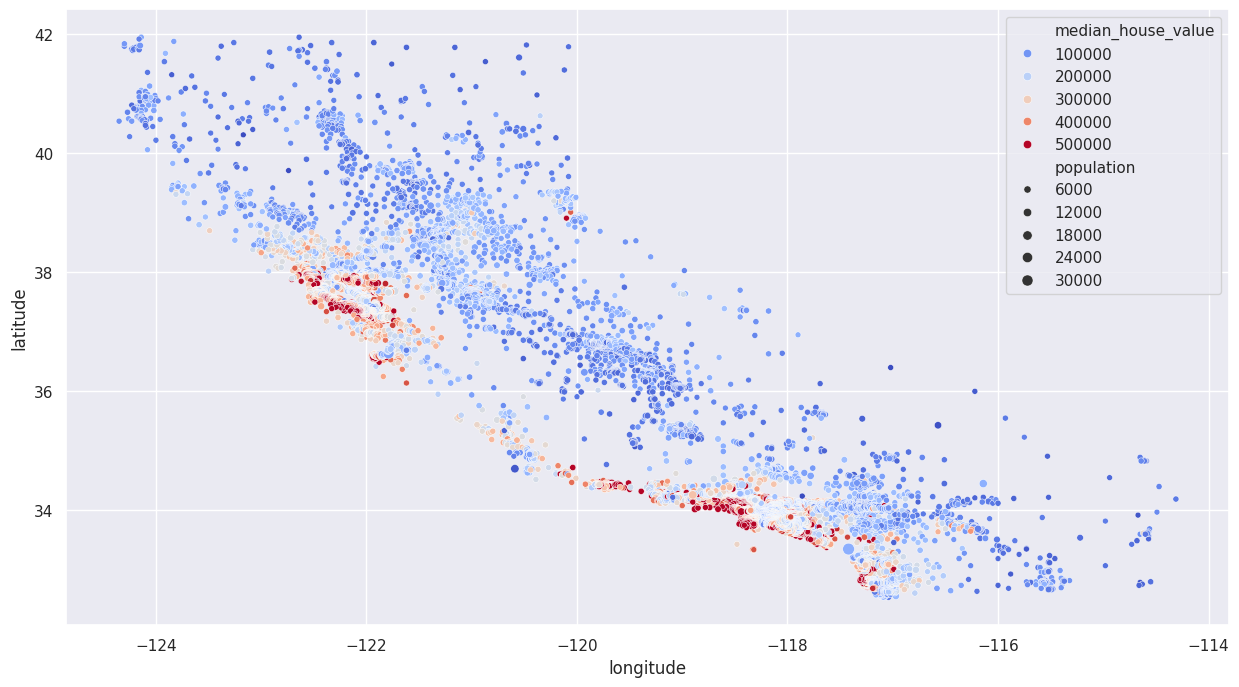

In [69]:
import seaborn as sb
sb.scatterplot(x="longitude", y="latitude", data=datos, hue="median_house_value", palette="coolwarm",
               size=datos["population"])

<Axes: xlabel='longitude', ylabel='latitude'>

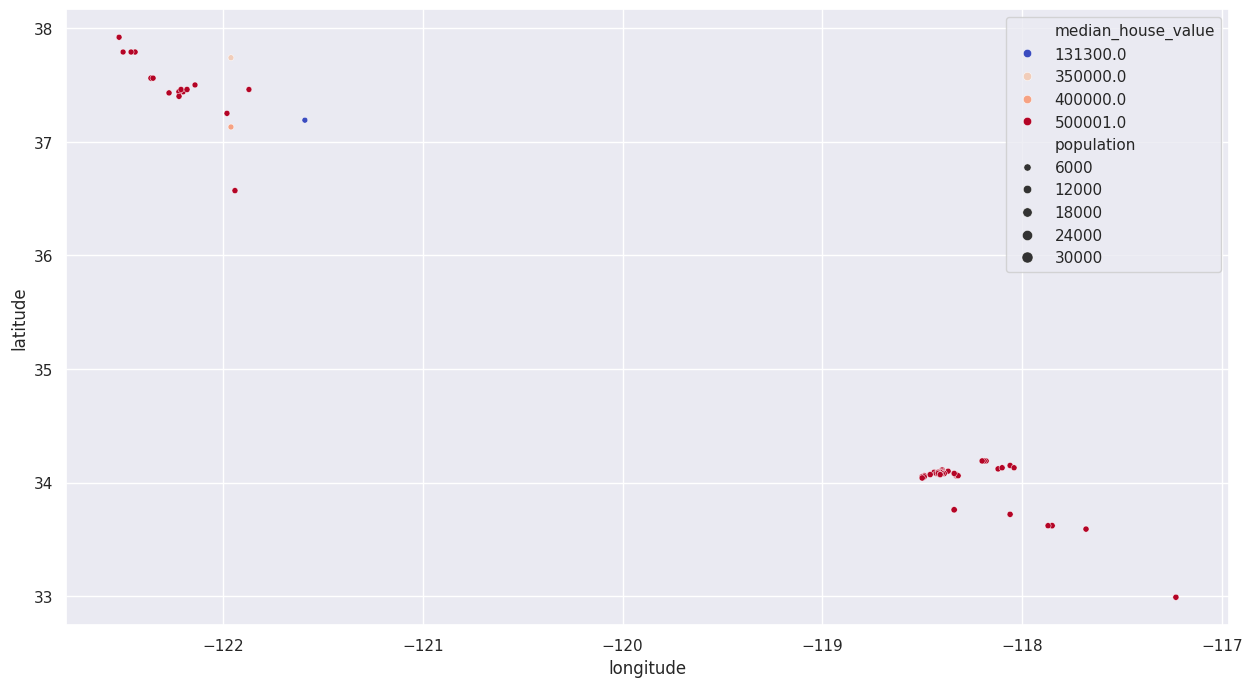

In [70]:
#en esta parte de la grafica muestra donde viven las personas que tiene mayores ingresos
sb.scatterplot(x="longitude", y="latitude", data=datos[(datos.median_income > 14)], hue="median_house_value", palette="coolwarm",
               size=datos["population"])

In [71]:
datos.info()
#solucion a la parte de total_bedrooms para que sean la misma cantidad de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [72]:
datos_na = datos.dropna() #borramos  o bien drop=quitar quitamos los datos que estes na

In [73]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [74]:
#convertir la caracteristica categorica a numerica
#que en este caso es de la columna ocean_proximity

datos_na["ocean_proximity"]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [75]:
datos_na["ocean_proximity"].value_counts()
#se puede hacer una transformacion donde a cada columna se asigne un valor que es 1,2,3,4,5 pero hay un problema
# estas relaciones le puede asignar mayor peso al de mayor valor y eso es incorrecto

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [76]:
#para solucionar este problema se usa algo llamados dummies o One-hot encoding
#el cual va asignar un 0 o 1 dependiendo del valor que haya en la columna
#es decir crea columnas nuevas las cuales nos da como resultado lo siguiente
# NEAR OCEAN   ISLAND    NEAR BAY
#     0          1         0
#     1          0         0
dummies = pand.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [77]:
# funcio .join()  ¿?
datos_na = datos_na.join(dummies)
# Nos crea nuevas columnas, pero aun hay que eliminar la columna ocean_proximity para el modelo de entrenamiento no lo tome en cuenta

In [78]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [79]:
#como drop no sabe si es una fila o una columna entonces se usa:
# axis = 1, lo cual indica que es una columna o bien significa "columnas"
datos_na = datos_na.drop(["ocean_proximity"], axis = 1)


#hay un error, porque no me salen los dummies, mi erro solo fue que no realize una actualización en la asignación de variable.

In [80]:
datos_na.head() #Este es mi nuevo set de datos y con esto es posible que el modelo se pueda entrenar

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [81]:
#Analisis de nuevas caracteristicas

In [82]:
datos_na.corr() #Una función corr() puede indicar correlaciones aunque en esta es confusa

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

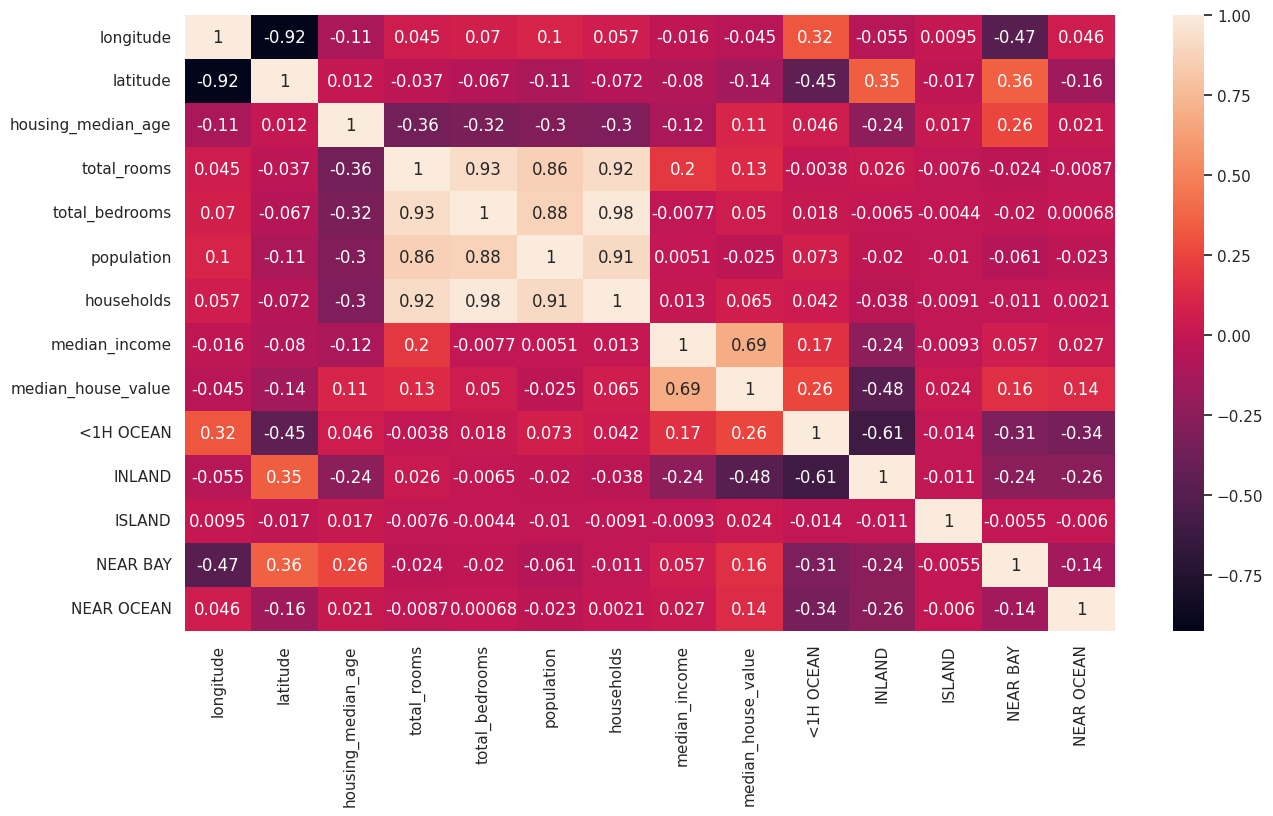

In [83]:
#Para poder entender mejor la correlación realizamos un grafica
sb.set(rc={"figure.figsize":(15,8)})#sirve para cambiar el tamaño de la gráfica
sb.heatmap(datos_na.corr(), annot=True) #Se crea la grafica con los datos_na y annot() que son los numeros que estan anotados en cada cuadro
#en caso de quieras cambiar el color de la grafica solo agregas cmap = "codigo" en la parte de sb.heatmap

In [84]:
#¿Cómo se interpreta la gráfica?
#Cuando modifico un valor, que tanto cambia otro valor
#Cada variable tiene un nivel de ralcion de -1 a 1 donde -1 es una relación inversa, donde un número aumenta el otro disminuye
#En el 0 no hay ninguna relación y el 1 es donde hay una relación perfecta

In [85]:
#Tambien se pueden analizar una parte de los datos, es decir si nosotros estamos interesados en saber cual es el costo promedio de la casa se puede hacer:
datos_na.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_house_value', ylabel='median_income'>

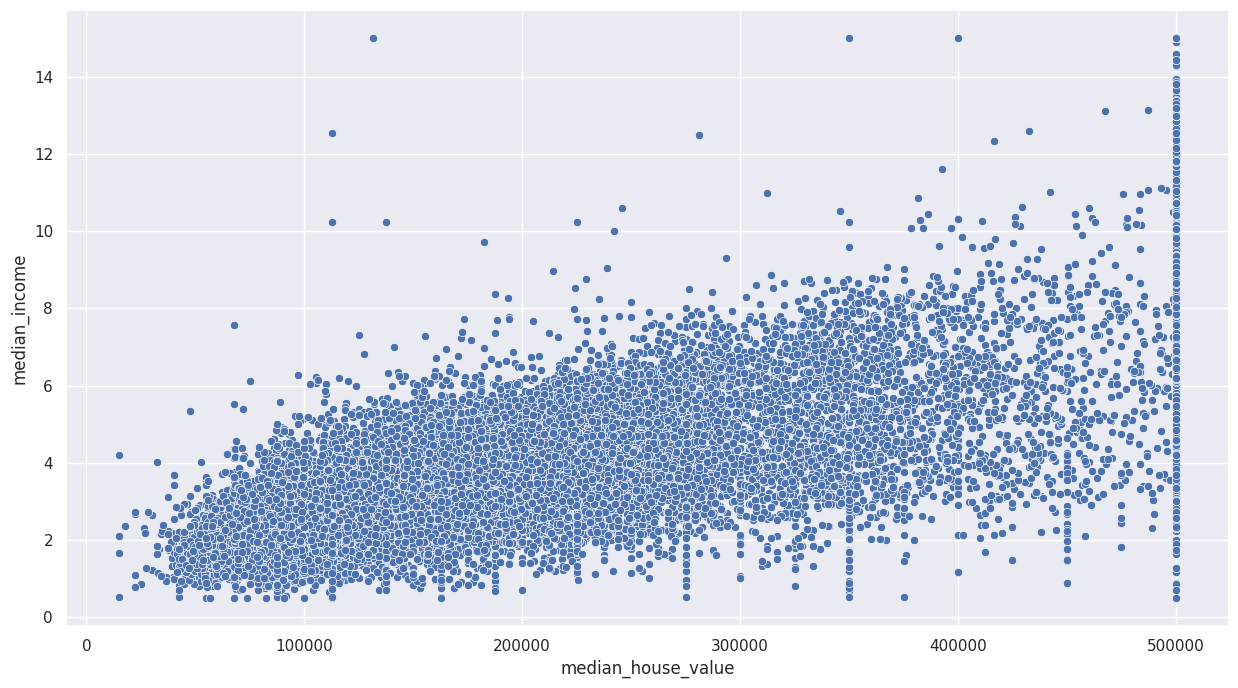

In [86]:
sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"], )

In [87]:
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

<Axes: >

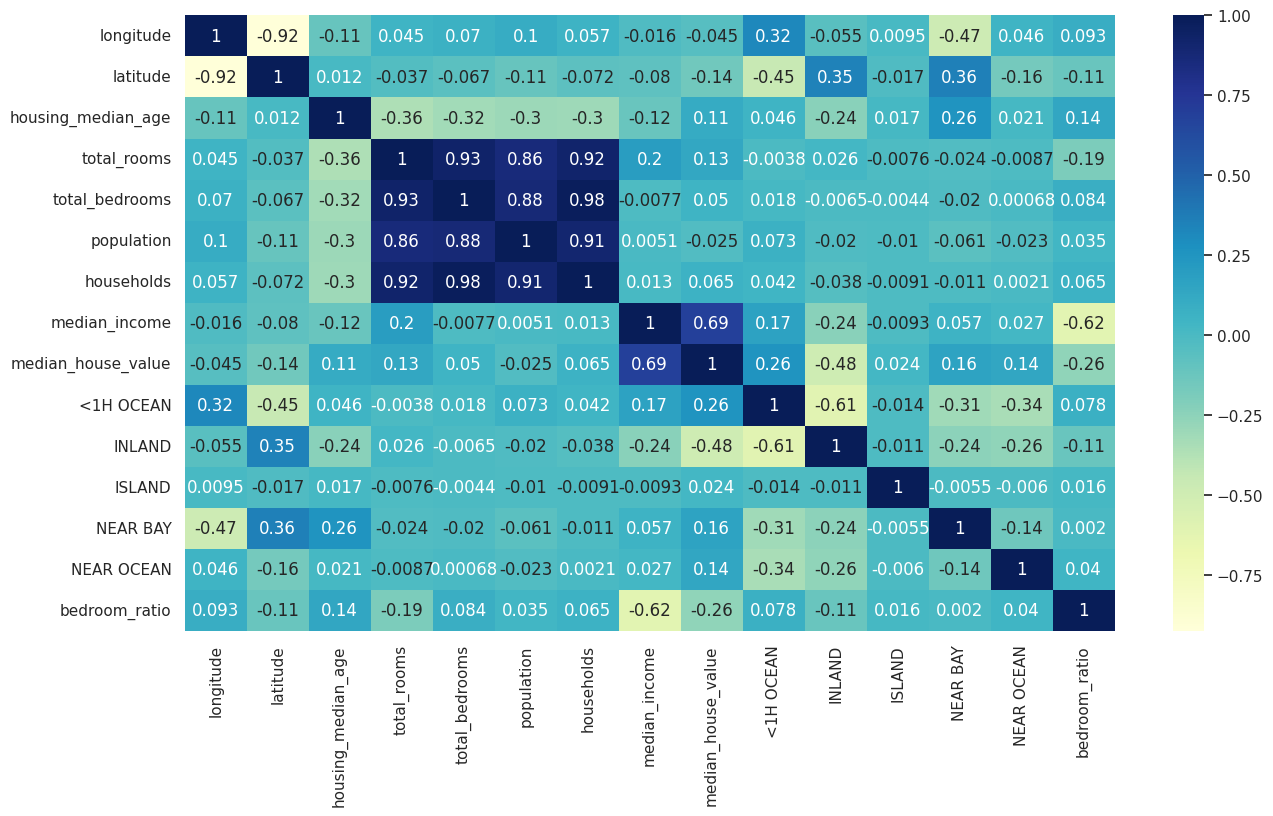

In [88]:
sb.set(rc={"figure.figsize":(15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [89]:
#En la gráfica anterior aparecen los bedroom_ratio que es la característica que agregamos
#La relación la podemos explicar de la sig manera, entre menos de los cuartos sean recamaras para dormir, más cuesta la casa.

In [90]:
#Separar las características de la etiqueta
X = datos_na.drop(["median_house_value"], axis=1)
y = datos_na["median_house_value"]

In [91]:
#Separar los datos en 2 partes: Conjunto de pruebas y conjunto de entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
X_train.shape #(registros, columnas) Esto solo es para ver como se separaron los datos y se puede hacer lo mismo con los otros 3 o la cantidad

(16346, 14)

In [93]:
from sklearn.linear_model import LinearRegression
#Uso del modelo para entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
predictions = model.predict(X_test) #Predicciones en nuestro conjunto de pruebas

In [95]:
import pandas as pd
comparativa = {"Prediccion": predictions, "Valor Real": y_test} #Comparativa
pd.DataFrame(comparativa)

,Prediccion,Valor Real
16858,228223.512745,242500.0
8544,176773.817451,275000.0
9552,78108.359284,94200.0
962,277881.030094,257300.0
938,218845.554331,178200.0
...,...,...
18491,158011.790418,198600.0
14243,101568.248877,83100.0
5515,259038.757769,307200.0
11385,354205.075109,337400.0


In [96]:
#El modelo funciona bien con los datos de entrenamiento pero muy mal con los datos de prueba esto es conocido como:
#Overfitting o sobreajuste
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6529287100811689
0.6481303685973355


In [97]:
#Error, saber que tanto estamos fallando en nuestras predicciones
from sklearn.metrics import mean_squared_error
import numpy as np

#Comparación de los datos reales con los datos de las predicciones, restan y hacen una elevación al cuadrado

mse = mean_squared_error(y_test, predictions)

In [98]:
mse #Da un dato enorme por el hecho de que se eleva el cuadrado, es un comun en el ML

4722844274.011024

In [99]:
#Corregir sería a partir de sacar la raíz cuadrada
rmse = np.sqrt(mse)
rmse
#El resultado del rmse nos da el promedio de cuanto se esta fallando al calcular el precio de todas las casas.

np.float64(68722.9530361656)

In [100]:
datos_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,0.219892


In [101]:
#En lo anterior podemos observar nuestros datos en general que se usan en el entrenamiento


In [102]:
datos_na.describe()
#Nos muestra la descripción de los datos, y la escala que hay entre ellos. De nuevo sucede que hay numeros con grandes diferencias, por lo que
#El modelo le daría mas peso a aquellos valores los cuales tienen un mayor valor.
#Para corregirlo implementamos un Scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
#Scaler o Escalamiento
#Pone a todos los datos en un rango pequeño, por ejemplo de 1 a 52 la diferencia sea la misma que entre 3 y 35000
#Lo que hace es comprimir los datos para que todos esten en un mismo rango y el modelo no le de mayor importancia a los valores grandes

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [104]:
X_train #Datos mostrados sin un scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
16012,-122.47,37.74,52.0,2055.0,265.0,735.0,252.0,8.1189,0,0,0,1,0,0.128954
12657,-121.46,38.52,34.0,1279.0,285.0,963.0,268.0,2.7100,0,1,0,0,0,0.222830
2988,-119.02,35.33,35.0,2053.0,412.0,1193.0,387.0,2.7500,0,1,0,0,0,0.200682
8379,-118.35,33.95,45.0,1076.0,213.0,781.0,238.0,3.9500,1,0,0,0,0,0.197955
18525,-122.04,36.97,45.0,1302.0,245.0,621.0,258.0,5.1806,0,0,0,0,1,0.188172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279,-117.13,32.71,38.0,993.0,246.0,760.0,205.0,1.1563,0,0,0,0,1,0.247734
1047,-120.66,38.40,18.0,2144.0,420.0,985.0,381.0,3.1750,0,1,0,0,0,0.195896
15524,-117.04,33.15,15.0,13814.0,2888.0,6583.0,2789.0,2.8247,1,0,0,0,0,0.209063
5375,-118.39,34.04,41.0,101.0,23.0,85.0,30.0,4.1250,1,0,0,0,0,0.227723


In [105]:
X_train_scaled #Datos mostrados con un scaler
pd.DataFrame(X_train_scaled)
#Todos los datos los puso en una escala pequeña sin demasiadas variciones del rango
#Y con estos datos podemos realizar el entrenamiento del modelo para obetener mejores resultados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.448820,0.990138,1.854109,-0.266490,-0.644048,-0.604704,-0.644774,2.261051,-0.891120,-0.681012,-0.015645,2.837418,-0.386244,-1.453711
1,-0.945159,1.355522,0.427049,-0.619457,-0.597081,-0.405761,-0.603251,-0.611587,-0.891120,1.468403,-0.015645,-0.352433,-0.386244,0.167141
2,0.271605,-0.138806,0.506330,-0.267400,-0.298839,-0.205073,-0.294424,-0.590343,-0.891120,1.468403,-0.015645,-0.352433,-0.386244,-0.215269
3,0.605717,-0.785255,1.299141,-0.711792,-0.766163,-0.564566,-0.681106,0.046971,1.122183,-0.681012,-0.015645,-0.352433,-0.386244,-0.262345
4,-1.234390,0.629438,1.299141,-0.608995,-0.691016,-0.704176,-0.629203,0.700536,-0.891120,-0.681012,-0.015645,-0.352433,2.589037,-0.431262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.214099,-1.366122,0.744173,-0.749545,-0.688667,-0.582890,-0.766747,-1.436749,-0.891120,-0.681012,-0.015645,-0.352433,2.589037,0.597124
16342,-0.546220,1.299309,-0.841449,-0.226008,-0.280052,-0.386565,-0.309995,-0.364628,-0.891120,1.468403,-0.015645,-0.352433,-0.386244,-0.297910
16343,1.258980,-1.160008,-1.079292,5.082140,5.515713,4.498010,5.939211,-0.550670,1.122183,-0.681012,-0.015645,-0.352433,-0.386244,-0.070558
16344,0.585770,-0.743095,0.982017,-1.155275,-1.212353,-1.171866,-1.220905,0.139912,1.122183,-0.681012,-0.015645,-0.352433,-0.386244,0.251612


In [106]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [108]:
predictions = model.predict(X_test_scaled)
comparativa = {"Prediccion": predictions, "Valor Real": y_test} #Comparativa
pd.DataFrame(comparativa)

,Prediccion,Valor Real
16858,228223.512745,242500.0
8544,176773.817451,275000.0
9552,78108.359284,94200.0
962,277881.030094,257300.0
938,218845.554331,178200.0
...,...,...
18491,158011.790418,198600.0
14243,101568.248877,83100.0
5515,259038.757769,307200.0
11385,354205.075109,337400.0
